# Projeto de Análise dos programas de pós graduação por região do Brasil

### Bruno Carvalho Ferro & Leonardo Tamanhão

In [99]:
## Importando as bibliotecas que serão utilizadas

import pandas as pd
import plotly.graph_objects as go
import json
import folium
%matplotlib inline

In [100]:
## Importando o GEOJSON do mapa do Brasil que será utilizado como base.

with open("./map.geojson") as response:
    mapa = json.load(response)

In [101]:
## Importando os dados dos programaças de pós graduação da CAPS registrados no ano de 2018

df = pd.read_csv("https://dadosabertos.capes.gov.br/dataset/903b4215-ea91-4927-8975-d1484891374f/resource/0f1737bd-6227-4193-9d11-0f9e981e9789/download/br-capes-colsucup-prog-2018-2019-10-01.csv",
                 encoding='latin-1', sep=';')

In [102]:
## Analisando os dados brutos obtidos

df.head()

,AN_BASE,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,NM_AREA_BASICA,NM_SUBAREA_CONHECIMENTO,NM_ESPECIALIDADE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,...,NM_PROGRAMA_IES,NM_PROGRAMA_IDIOMA,NM_GRAU_PROGRAMA,CD_CONCEITO_PROGRAMA,AN_INICIO_PROGRAMA,AN_INICIO_CURSO,DS_SITUACAO_PROGRAMA,DT_SITUACAO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_FOTO_PROGRAMA
0,2018,MULTIDISCIPLINAR,CIÊNCIAS AMBIENTAIS,CIÊNCIAS AMBIENTAIS,NÃO SE APLICA,NÃO SE APLICA,49,CIÊNCIAS AMBIENTAIS,UNB,UNIVERSIDADE DE BRASÍLIA,...,DESENVOLVIMENTO SUSTENTÁVEL,SUSTAINABLE DEVELOPMENT,MESTRADO/DOUTORADO,7,1996,1998/1996,EM FUNCIONAMENTO,27FEB13:00:00:00,137750,73634
1,2018,ENGENHARIAS,ENGENHARIA CIVIL,ENGENHARIA CIVIL,NÃO SE APLICA,NÃO SE APLICA,10,ENGENHARIAS I,UFJF,UNIVERSIDADE FEDERAL DE JUIZ DE FORA,...,ENGENHARIA CIVIL,POST-GRADUATE PROGRAM IN CIVIL ENGINEERING,MESTRADO,3,2017,2017,EM FUNCIONAMENTO,06MAR17:00:00:00,137737,73622
2,2018,ENGENHARIAS,ENGENHARIA MECÂNICA,ENGENHARIA MECÂNICA,NÃO SE APLICA,NÃO SE APLICA,13,ENGENHARIAS III,UNIPAMPA,FUNDAÇÃO UNIVERSIDADE FEDERAL DO PAMPA,...,ENGENHARIA,GRADUATE PROGRAM IN ENGINEERING,MESTRADO,3,2011,2011,EM FUNCIONAMENTO,23APR12:00:00:00,138443,74281
3,2018,CIÊNCIAS DA SAÚDE,ODONTOLOGIA,ODONTOLOGIA,NÃO SE APLICA,NÃO SE APLICA,18,ODONTOLOGIA,UNIP,UNIVERSIDADE PAULISTA,...,ODONTOLOGIA,PROGRAMME OF MASTER¿S DEGREE COURSE IN DENTISTRY,MESTRADO/DOUTORADO,4,1993,1993/2015,EM FUNCIONAMENTO,29OCT12:00:00:00,138620,74392
4,2018,CIÊNCIAS SOCIAIS APLICADAS,PLANEJAMENTO URBANO E REGIONAL,PLANEJAMENTO URBANO E REGIONAL,NÃO SE APLICA,NÃO SE APLICA,30,PLANEJAMENTO URBANO E REGIONAL / DEMOGRAFIA,UDESC,UNIVERSIDADE DO ESTADO DE SANTA CATARINA,...,PLANEJAMENTO TERRITORIAL E DESENVOLVIMENTO SÓC...,TERRITORIAL PLANNING AND SOCIO ENVIRONMENTAL D...,DOUTORADO,4,2016,2016,EM FUNCIONAMENTO,14APR16:00:00:00,138696,74468


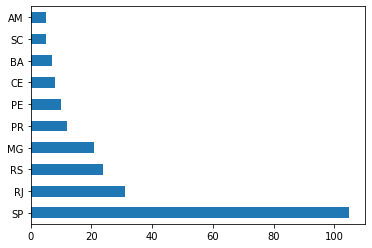

In [103]:
curso = "MEDICINA"

df.loc[df["NM_AREA_CONHECIMENTO"] == curso] ["SG_UF_PROGRAMA"].value_counts().head(10).plot(kind='barh')

In [104]:
## Analisando todas as colunas envolvidas

df.columns

Index(['AN_BASE', 'NM_GRANDE_AREA_CONHECIMENTO', 'NM_AREA_CONHECIMENTO',
       'NM_AREA_BASICA', 'NM_SUBAREA_CONHECIMENTO', 'NM_ESPECIALIDADE',
       'CD_AREA_AVALIACAO', 'NM_AREA_AVALIACAO', 'SG_ENTIDADE_ENSINO',
       'NM_ENTIDADE_ENSINO', 'IN_REDE', 'SG_ENTIDADE_ENSINO_REDE',
       'CS_STATUS_JURIDICO', 'DS_DEPENDENCIA_ADMINISTRATIVA',
       'DS_ORGANIZACAO_ACADEMICA', 'NM_REGIAO', 'SG_UF_PROGRAMA',
       'NM_MUNICIPIO_PROGRAMA_IES', 'NM_MODALIDADE_PROGRAMA',
       'CD_PROGRAMA_IES', 'NM_PROGRAMA_IES', 'NM_PROGRAMA_IDIOMA',
       'NM_GRAU_PROGRAMA', 'CD_CONCEITO_PROGRAMA', 'AN_INICIO_PROGRAMA',
       'AN_INICIO_CURSO', 'DS_SITUACAO_PROGRAMA', 'DT_SITUACAO_PROGRAMA',
       'ID_ADD_FOTO_PROGRAMA_IES', 'ID_ADD_FOTO_PROGRAMA'],
      dtype='object')

In [105]:
## Organizando o DataFrame por Estado(UF)

df_uf = df.sort_values(["SG_UF_PROGRAMA"])


df_uf.head()

,AN_BASE,NM_GRANDE_AREA_CONHECIMENTO,NM_AREA_CONHECIMENTO,NM_AREA_BASICA,NM_SUBAREA_CONHECIMENTO,NM_ESPECIALIDADE,CD_AREA_AVALIACAO,NM_AREA_AVALIACAO,SG_ENTIDADE_ENSINO,NM_ENTIDADE_ENSINO,...,NM_PROGRAMA_IES,NM_PROGRAMA_IDIOMA,NM_GRAU_PROGRAMA,CD_CONCEITO_PROGRAMA,AN_INICIO_PROGRAMA,AN_INICIO_CURSO,DS_SITUACAO_PROGRAMA,DT_SITUACAO_PROGRAMA,ID_ADD_FOTO_PROGRAMA_IES,ID_ADD_FOTO_PROGRAMA
3023,2018,CIÊNCIAS DA SAÚDE,MEDICINA,ANATOMIA PATOLÓGICA E PATOLOGIA CLÍNICA,ANATOMIA PATOLÓGICA E PATOLOGIA CLÍNICA,NÃO SE APLICA,16,MEDICINA II,UFAC,UNIVERSIDADE FEDERAL DO ACRE,...,CIÊNCIAS DA SAÚDE NA AMAZÔNIA OCIDENTAL,HEALTH SCIENCES IN THE WESTERN AMAZON,MESTRADO,3,2016,2016,EM FUNCIONAMENTO,05AUG15:00:00:00,141439,76698
1305,2018,"LINGÜÍSTICA, LETRAS E ARTES",LETRAS,LETRAS,NÃO SE APLICA,NÃO SE APLICA,41,LINGUÍSTICA E LITERATURA,UFAC,UNIVERSIDADE FEDERAL DO ACRE,...,LETRAS- LINGUAGEM E IDENTIDADE,LETTERS - LINGUAGE AND IDENTITY,MESTRADO,4,2006,2006,EM FUNCIONAMENTO,30JAN13:00:00:00,141313,76645
2484,2018,MULTIDISCIPLINAR,ENSINO,ENSINO DE CIÊNCIAS E MATEMÁTICA,ENSINO DE CIÊNCIAS E MATEMÁTICA,NÃO SE APLICA,46,ENSINO,UFAC,UNIVERSIDADE FEDERAL DO ACRE,...,ENSINO DE CIÊNCIAS E MATEMÁTICA,PROFESSIONAL MASTER IN TEACHING SCIENCE AND MA...,MESTRADO PROFISSIONAL,3,2014,2014,EM FUNCIONAMENTO,12DEC13:00:00:00,141204,76477
509,2018,MULTIDISCIPLINAR,INTERDISCIPLINAR,MEIO AMBIENTE E AGRÁRIAS,MEIO AMBIENTE E AGRÁRIAS,NÃO SE APLICA,45,INTERDISCIPLINAR,UFAC,UNIVERSIDADE FEDERAL DO ACRE,...,"CIÊNCIA, INOVAÇÃO E TECNOLOGIA PARA A AMAZÔNIA","SCIENCE, TECHNOLOGY AND INNOVATION FOR THE AMAZON",MESTRADO,3,2011,2011,EM FUNCIONAMENTO,11JAN13:00:00:00,138700,74472
1045,2018,CIÊNCIAS AGRÁRIAS,MEDICINA VETERINÁRIA,MEDICINA VETERINÁRIA,NÃO SE APLICA,NÃO SE APLICA,24,MEDICINA VETERINÁRIA,UFAC,UNIVERSIDADE FEDERAL DO ACRE,...,SANIDADE E PRODUÇÃO ANIMAL SUSTENTÁVEL NA AMAZ...,HEALTH AND SUSTAINABLE ANIMAL PRODUCTION IN TH...,MESTRADO/DOUTORADO,4,2014,2014/2017,EM FUNCIONAMENTO,01NOV13:00:00:00,141419,76678


In [106]:
cod_ufs = []
for i in range(len(mapa["features"])):
    cod_ufs.append((mapa["features"][i]["properties"]["COD_UF"]))


In [107]:
## Calculando o número de programas por UF
ufs = {"AC":0, "AL":0, "AP":0, "AM":0, "BA":0, "CE":0, "DF":0, "ES":0, "GO":0, "MA":0, "MT":0, "MS":0, "MG":0, "PA":0, "PB":0,
       "PR":0, "PE":0, "PI":0, "RJ":0, "RN":0,"RS":0, "RO":0, "RR":0, "SC":0, "SP":0, "SE":0, "TO":0}
for estado in df_uf["SG_UF_PROGRAMA"]:
    for uf in ufs:
        if(estado == uf):
            ufs[uf] = ufs[uf] + 1

print(ufs)

{'AC': 10, 'AL': 40, 'AP': 7, 'AM': 60, 'BA': 184, 'CE': 128, 'DF': 117, 'ES': 76, 'GO': 107, 'MA': 49, 'MT': 61, 'MS': 73, 'MG': 444, 'PA': 117, 'PB': 110, 'PR': 344, 'PE': 166, 'PI': 41, 'RJ': 493, 'RN': 108, 'RS': 418, 'RO': 12, 'RR': 13, 'SC': 175, 'SP': 925, 'SE': 54, 'TO': 25}


In [108]:
data = {"estados": list(ufs.keys()), "valores": list(ufs.values()), "cod_ufs": cod_ufs}
df_local = pd.DataFrame.from_dict(data)
df_local

,estados,valores,cod_ufs
0,AC,10,12
1,AL,40,27
2,AP,7,16
3,AM,60,13
4,BA,184,29
5,CE,128,23
6,DF,117,53
7,ES,76,32
8,GO,107,52
9,MA,49,21


In [109]:
df_local.estados.astype(str)

0     AC
1     AL
2     AP
3     AM
4     BA
5     CE
6     DF
7     ES
8     GO
9     MA
10    MT
11    MS
12    MG
13    PA
14    PB
15    PR
16    PE
17    PI
18    RJ
19    RN
20    RS
21    RO
22    RR
23    SC
24    SP
25    SE
26    TO
Name: estados, dtype: object

In [110]:
## Plotando o mapa do Brasil que será utilizado como dashboard das informações

# fig = go.Figure(go.Choroplethmapbox(geojson=mapa, locations=mapa.properties.id,  z=df_local.estados.astype(str), colorscale="Viridis",
#                                    zmin=0, zmax=1000, marker_opacity=0.5, marker_line_width=0))

# fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=3, mapbox_center = {"lat": -15, "lon": -51})

# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# fig.show()

In [111]:
m = folium.Map(location = [-15, -54])
folium.Choropleth(geo_data = mapa,
                 data = df_local,
                 columns = ["cod_ufs", "valores"],
                 key_on = "features.id",
                 fill_color="YlOrRd",
                 fill_opacity=0.7,
                line_opacity=0.5).add_to(m)
folium.LayerControl().add_to(m)
m

AttributeError: 'NoneType' object has no attribute 'get'